In [ ]:
!pip install tensorflow

**IMPORT LIBRARIES**

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**IMPORT DATASETS AND PERFORM EDA**

In [ ]:
df1=pd.read_csv("mental-and-substance-use-as-share-of-disease.csv")
df2=pd.read_csv("prevalence-by-mental-and-substance-use-disorder.csv")

In [ ]:
df1.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986


In [ ]:
df2.head()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [ ]:
print(df1.describe)
print(df2.describe)

<bound method NDFrame.describe of            Entity Code  Year  \
0     Afghanistan  AFG  1990   
1     Afghanistan  AFG  1991   
2     Afghanistan  AFG  1992   
3     Afghanistan  AFG  1993   
4     Afghanistan  AFG  1994   
...           ...  ...   ...   
6835     Zimbabwe  ZWE  2015   
6836     Zimbabwe  ZWE  2016   
6837     Zimbabwe  ZWE  2017   
6838     Zimbabwe  ZWE  2018   
6839     Zimbabwe  ZWE  2019   

      DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
0                                              1.696670                                                
1                                              1.734281                                                
2                                              1.791189                                                
3                                              1.776779                                                
4                                              1.712986      

In [ ]:
data = pd.merge(df1, df2)
data.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 11 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           6840 non-null   object 
 1   Code                                                                                             6150 non-null   object 
 2   Year                                                                                             6840 non-null   int64  
 3   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  6840 non-null   float64
 4   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                         6840 non-null   float64
 5   Preval

In [ ]:
data.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)      0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Pe

In [ ]:
data.drop(['Entity','Code','Year'],axis=1,inplace=True)

In [ ]:
data.head()

,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [ ]:
data.set_axis(['mental_fitness','Schizophrenia', 'Bipolar_disorder', 'Eating_disorder','Anxiety','drug_usage','depression','alcohol'], axis='columns', inplace=True)

<ipython-input-11-e6c29cabb45c>:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data.set_axis(['mental_fitness','Schizophrenia', 'Bipolar_disorder', 'Eating_disorder','Anxiety','drug_usage','depression','alcohol'], axis='columns', inplace=True)


In [ ]:
data.head()

,mental_fitness,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,drug_usage,depression,alcohol
0,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


[]

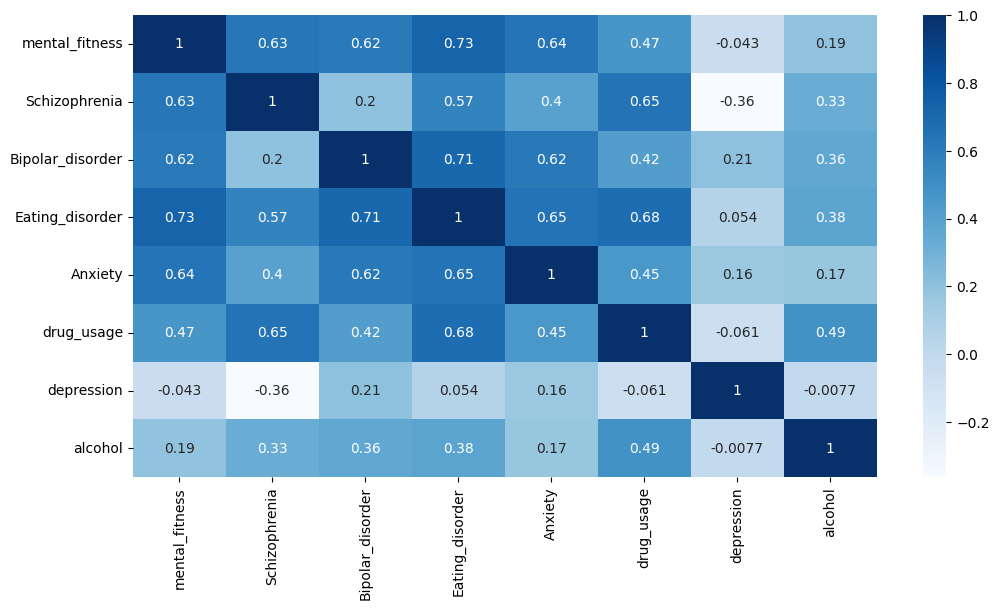

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.plot()

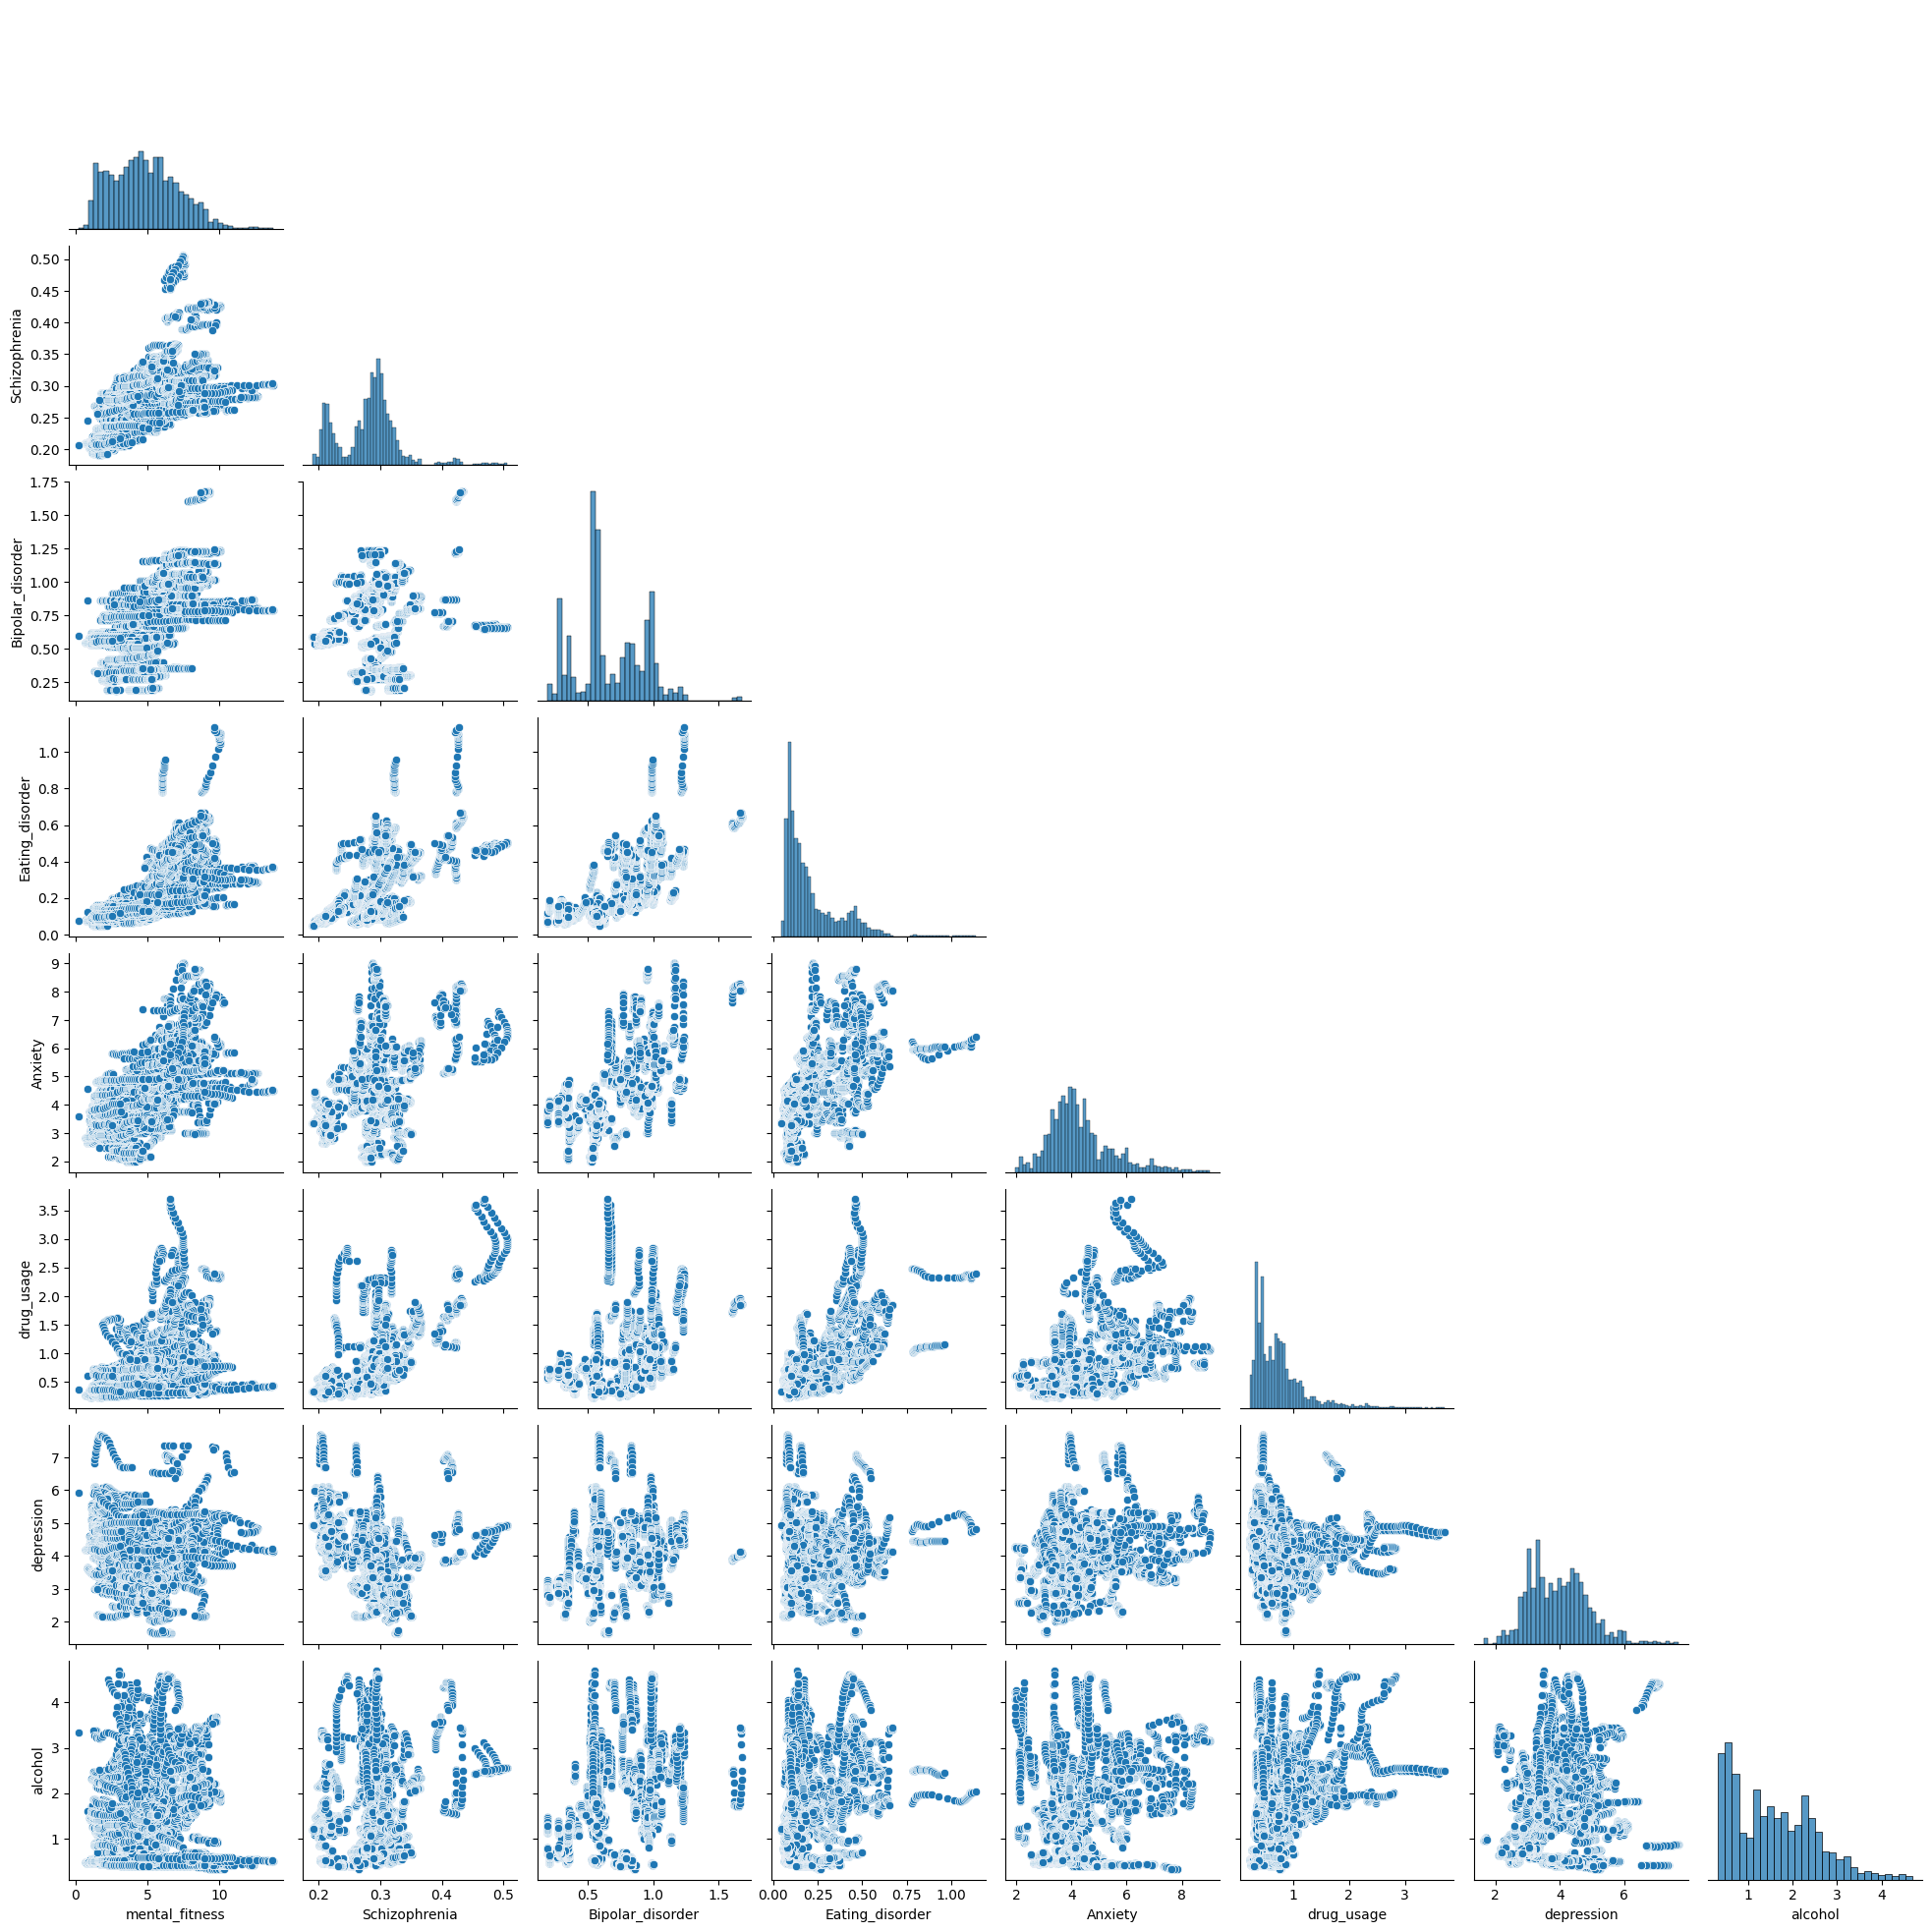

In [ ]:
sns.pairplot(data,corner=True)
plt.show()

**DATA PREPROCESSING**

In [ ]:
x=data[['Schizophrenia',
       'Bipolar_disorder',
       'Eating_disorder',
       'Anxiety',
       'drug_usage',
       'depression',
        'alcohol',]].to_numpy()

y=data[['mental_fitness']].to_numpy()

In [ ]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y)

**FITTING THE MODEL**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg=RandomForestRegressor()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

<ipython-input-16-fff2eb73bd6f>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(x_train,y_train)


**MODEL EVALUATION**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:\n")

print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


Model Performance:

MSE is 0.04021379247717128
RMSE is 0.2005337689197789
R2 score is 0.9922162257034036


In [ ]:
np.random.seed(range(0,100))
print('MENTAL FITNESS TRACKER!!!')
print()
schi = (float(input('Enter your Schizophrenia rate in % : ')))/100
bip = (float(input('Enter your bipolar disorder rate in % : ')))/100
eatd = (float(input('Enter your eating disorder rate in % : ')))/100
anx = (float(input('Enter your Anxiety rate in % : ')))/10
drug = (float(input('Enter your drug usage rate in % : ')))/100
depr = (float(input('Enter your Depression rate in % : ')))/10
alc = (float(input('Enter your Alchohol consumption rate in % : ')))/100

prediction = reg.predict([[schi,bip,eatd,anx,drug,depr,alc]])
print("Your Mental Fitness is {}%".format(round(float(prediction*10),2)))

MENTAL FITNESS TRACKER!!!

Enter your Schizophrenia rate in % : 3
Enter your bipolar disorder rate in % : 30
Enter your eating disorder rate in % : 50
Enter your Anxiety rate in % : 70
Enter your drug usage rate in % : 20
Enter your Depression rate in % : 48
Enter your Alchohol consumption rate in % : 2
Your Mental Fitness is 73.44%
